---
## IMDB 딥러닝 모델
---
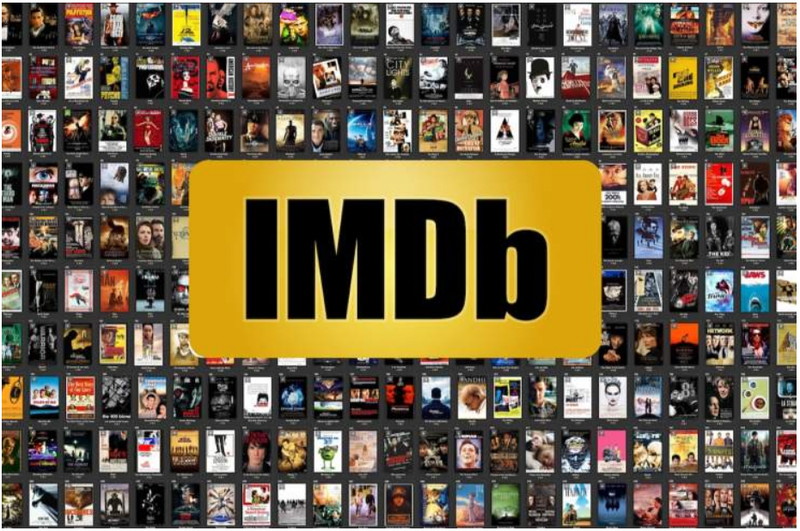  

IMDB 데이터셋은 영화 사이트 IMDB의 리뷰 데이터를 모아놓은 것  
텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터  
데이터셋은 리뷰 텍스트와 레이블로 구성  
레이블은 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시  

### 데이터 로드 및 전처리

In [10]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [18]:
# IMDB의 데이터셋은 인덱스로만 구성
# 실제 단어들로 변환하기 위해서는 단어 인덱스 딕셔너리를 이용
# imdb.get_word_index() : 단어 인덱스 딕셔너리를 가져오는 함수
word_index = imdb.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])

print(len(word_index))

88584


In [19]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

In [20]:
# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [21]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [22]:
# 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [24]:
print(train_labels[0])
print(test_labels[0])

# IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1
0
1.0
0.0


### 모델 구성

In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Sequential() 함수를 이용해서 순차적으로 레이어를 추가
model = models.Sequential()

# 첫번째 레이어 - Dense레이어, 유닛수 16개, input_shape (10000, )(10000개 차원 데이터 입력), 활성화 함수(activation) relu, 이름 'input'
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))

# 두번째 레이어 - Dense레이어, 유닛수 16개, 활성화 함수 relu, 이름 'hidden'
model.add(layers.Dense(16, activation='relu', name='hidden'))

# 세번째 레이어 - Dense레이어, 유닛수 1개(긍정/부정 결과만 받음), 활성화 함수 sigmoid, 이름 'output'
model.add(layers.Dense(1, activation='sigmoid', name='output'))

### 모델 컴파일 및 학습

In [27]:
'''
옵티마이저(optimizer) -  rmsprop
손실 함수(loss) - binary_crossentropy (긍정/부정만 분류)
지표(metrics) - accuracy 사용
'''
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# summary() 함수를 사용해 모델의 구조를 시각화
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [28]:
'''
이제 딥러닝 모델을 학습하기 위해 fit() 함수를 실행
학습에 사용되는 데이터로 x_train과 y_train을 지정
에폭 수(epochs) 20 지정
배치 사이즈(batch_size) 512 지정
검증 데이터 x_test와 y_test 지정
'''
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 16s 81ms/step - loss: 0.4545 - accuracy: 0.8179 - val_loss: 0.3367 - val_accuracy: 0.8810
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2606 - accuracy: 0.9087 - val_loss: 0.3031 - val_accuracy: 0.8790
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2002 - accuracy: 0.9297 - val_loss: 0.2875 - val_accuracy: 0.8854
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1680 - accuracy: 0.9416 - val_loss: 0.2915 - val_accuracy: 0.8844
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1440 - accuracy: 0.9495 - val_loss: 0.3163 - val_accuracy: 0.8770
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1233 - accuracy: 0.9584 - val_loss: 0.3748 - val_accuracy: 0.8659
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1071 - accuracy: 0.9638 - val_loss: 0.3629 - val_accuracy: 0.8706
Epoch 8/20
4

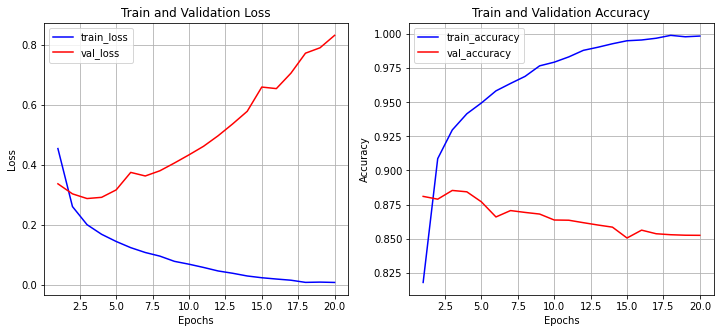

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()